### Running the previous step in the pipeline: Exploratory Data Analysis.

/home/not_real_fu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 80000
    })
    validation: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'label', 'source', 'reasoning'],
        num_rows: 10200
    })
})
                                                text            label  \
0  Your flight has been rescheduled for 10:00 AM ...          neutral   
1  We're happy to accommodate your dietary prefer...           polite   
2  Our vegetarian options are available on the me...          neutral   
3  I understand your frustration with the recent ...  somewhat polite   
4  I'll do my best to find a suitable replacement...  somewhat polite   

                                  source  \
0  meta-llama/Meta-Llama-3.1-8B-Instruct   
1  meta-llama/Meta-Llama-3.1-8B-Instruct   
2  meta-llama/Meta-Llama-3.1-8B-Instruct   
3  meta-llama/Meta-Llama-3.1

[nltk_data] Downloading package stopwords to /home/joca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['flight reschedul tomorrow pleas check airport websit updat chang', 'happi accommod dietari prefer vegetarian option care craft ensur delici satisfi meal would like recommend dish fit need', 'vegetarian option avail menu chef modifi dish suit dietari need', 'understand frustrat recent tournament result review stand see improv experi', 'best find suitabl replac item look need know look']
['appreci interest vegetarian option provid list current dish cater dietari prefer', 'understand concern ski lesson look option reschedul', 'technic skill cours cover essenti topic data analysi includ data visual statist model cours materi avail learn platform', 'buffet hour pm pleas note limit select option avail lunch break', 'look polici detail see option avail']
                                                text            label  \
0  Your flight has been rescheduled for 10:00 AM ...          neutral   
1  We're happy to accommodate your dietary prefer...           polite   
2  Our vegetarian opt

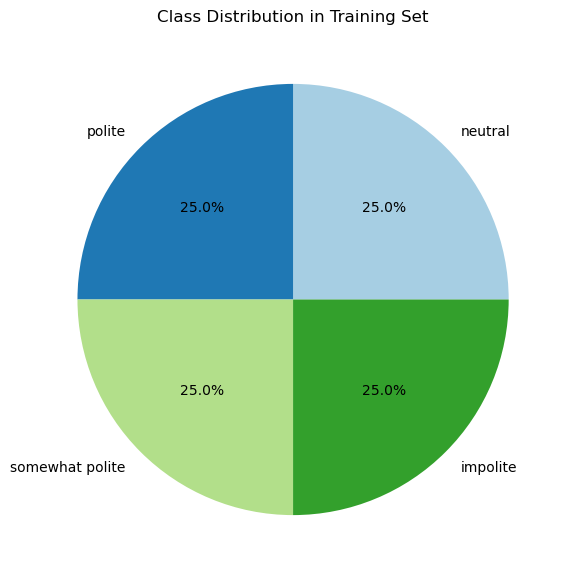

First Quartile (Q1) for unclean text: 23.0
Third Quartile (Q3) for unclean text: 38.0
First Quartile (Q1) for clean text: 10.0
Third Quartile (Q3) for clean text: 18.0


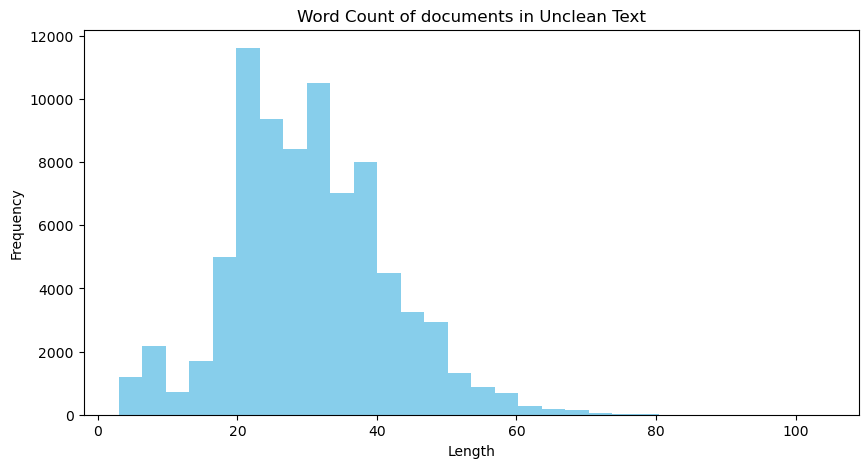

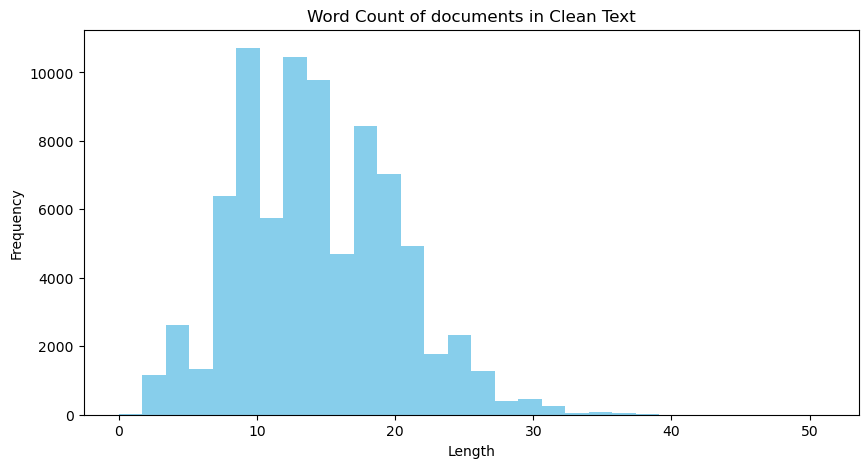

First Quartile (Q1) for unclean text: 129.0
Third Quartile (Q3) for unclean text: 217.0
First Quartile (Q1) for clean text: 63.0
Third Quartile (Q3) for clean text: 116.0


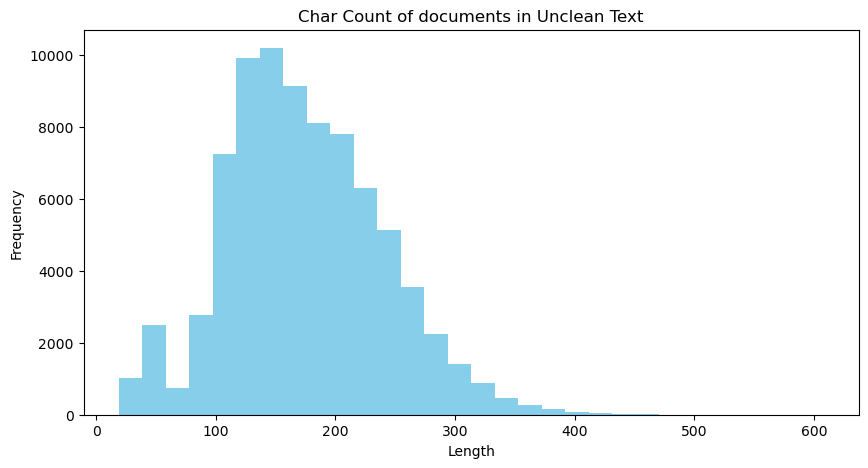

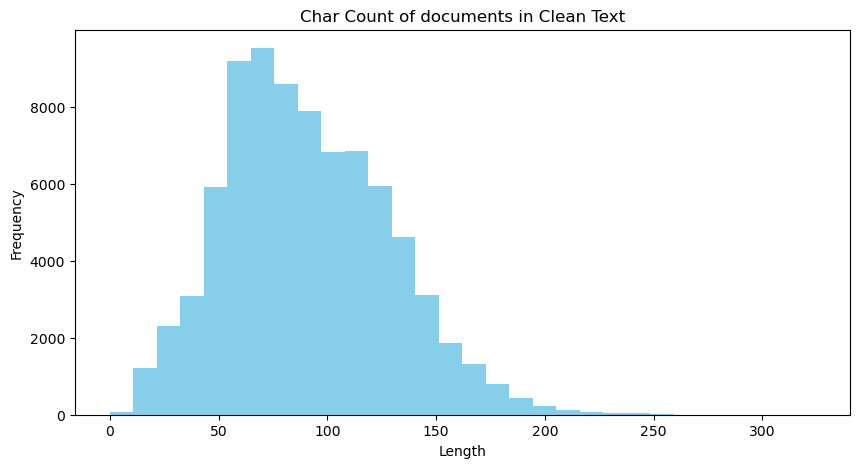

Unclean text average sentence length:
84.82997663690476
Clean text average sentence length:


/home/joca/miniconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/joca/miniconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


90.54438180477256
Unclean text average word length:
4.7908009727635275
Clean text average word length:
5.370793926543044


/tmp/ipykernel_7932/1921715280.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")


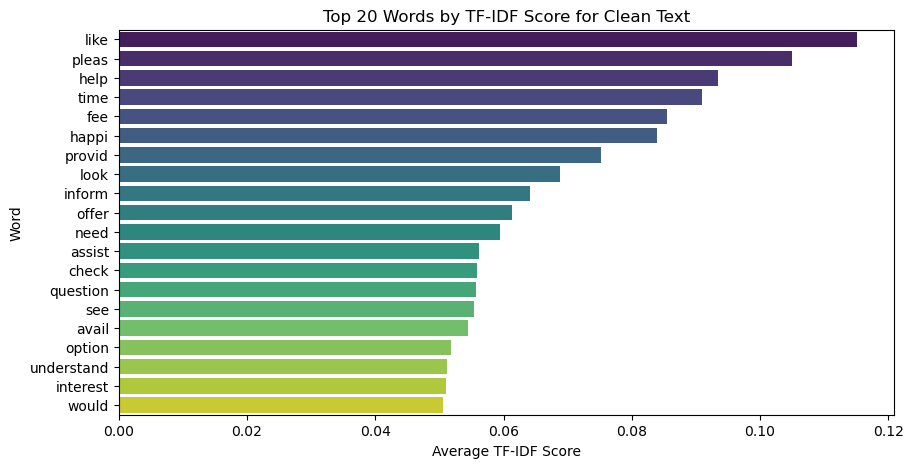

/tmp/ipykernel_7932/1921715280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tfidf_mean.values, y=tfidf_mean.index, palette="viridis")


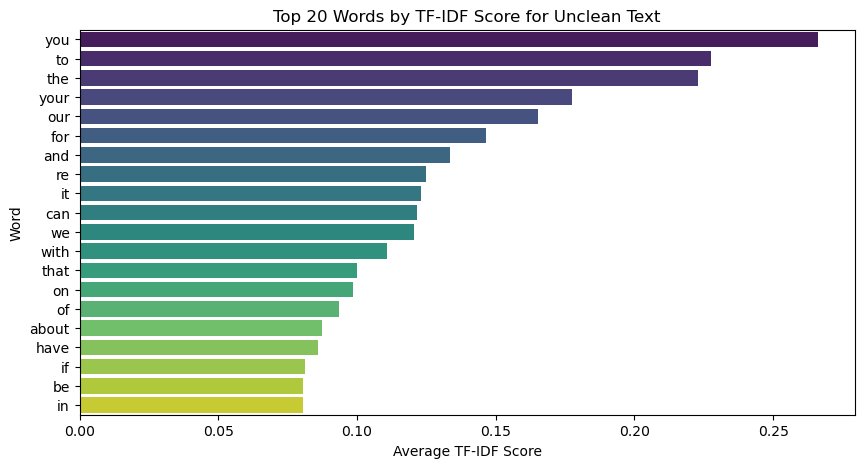

In [3]:
%run ./3.exploratory_data_analysis.ipynb

## **Representing the corpus in different models**
##### Now that we have cleaned documents from our dataset, it's time to represent them in different textual representations so we can use them to train our model.
#### **You might want to comment the blocks of code of the Space Representation Models section due to its sparity and they might be too inefficient due to the large dataset size.**
#### **Some computers might not meet the hardware requirements to store these sparce vectors. So we limited the numer of max features each sparse vector representation had to 3000**. We chose this value because it seemed like a middle ground across different text representational models This has some implications in certain representational models as we will discuss next.

In [4]:
max_features = 1000;
feature_representations = {}

## **Sparce representation models**
#### We are working mainly with 3 sparse representational models:
- #### **Bag of Words**;
- #### **1-Hot vector**;
- #### **Tf-Idf vector**;

### First representation model is **Bag of Words**

In [5]:

from sklearn.feature_extraction.text import CountVectorizer;
import numpy as np;

# print all the array content
np.set_printoptions(threshold=np.inf)

#cv_orig = CountVectorizer(); commented for performance
cv = CountVectorizer(max_features=max_features);

#BoW_orig = cv_orig.fit_transform(clean_corpus).toarray(); commented for performance
BoW = cv.fit_transform(clean_corpus).toarray();
print("Cleaned text before the feature cut: 4981"); #value obtained by analyzing the clean text before the cut
print("Cleaned text after the cut:", BoW.shape);

feature_representations['BoW'] = (BoW, BoW_test);


#print(cv.get_feature_names_out());

#print(BoW[0]);

Cleaned text before the feature cut: 4981
Cleaned text after the cut: (80000, 3000)


##### We compared the representation of the unclean and clean version of the corpus as well, the unclean corpus would crash the kernel because the BoW generated would be too big for the memory according to its sparsity and number of features (>7000 approx.);
##### As we can see, the cleaned text reduced the feature size (column number, y of the pair "(x,y)" of shape) by a significant amount because we reduced the words to their stem, standardized the capitalization and removed unecessary tokens like punctuation.
##### This increases the model performance by eliminating unecessary repetitions.
#### **Possible side effects of limiting the maximum number of features :**
##### By **limiting the "max_features" to 3000**, despite incresing performance in terms of memory, we might be ignoring certain features that, despite having a low occurence in terms of term frequency across the documents, in specific documents of our corpus set (rows of annotated experiences of the trainees) might occur frequently, contributing to a better distinction of that specific document. This might degrade the performance of models trained using this representation

In [6]:

cv_unclean = CountVectorizer(max_features=max_features);
Bow_unclean = cv_unclean.fit_transform(unclean_corpus).toarray();
print("Unclean text",Bow_unclean.shape);
print("Cleaned text", BoW.shape);



Unclean text (80000, 1000)
Cleaned text (80000, 1000)


#### We can also plot a **wordcloud** using the representation (although it only uses the text corpus to count and not the vectorizer) respectively for:
- #### Unclean text;
- #### Clean text;

Word Cloud for unclean corpus


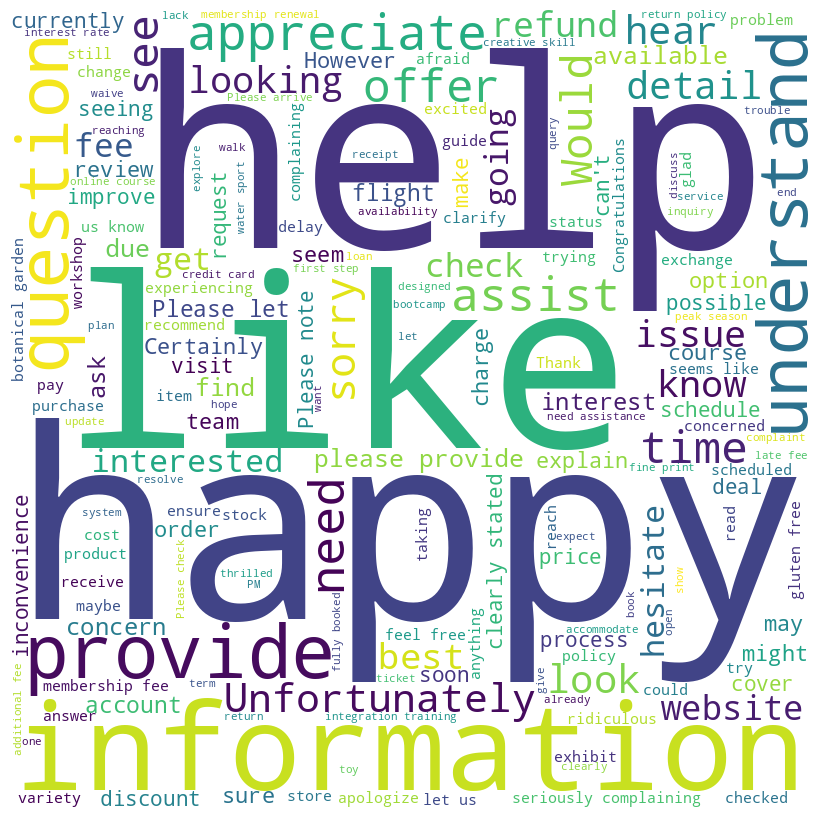

Word Cloud for clean corpus


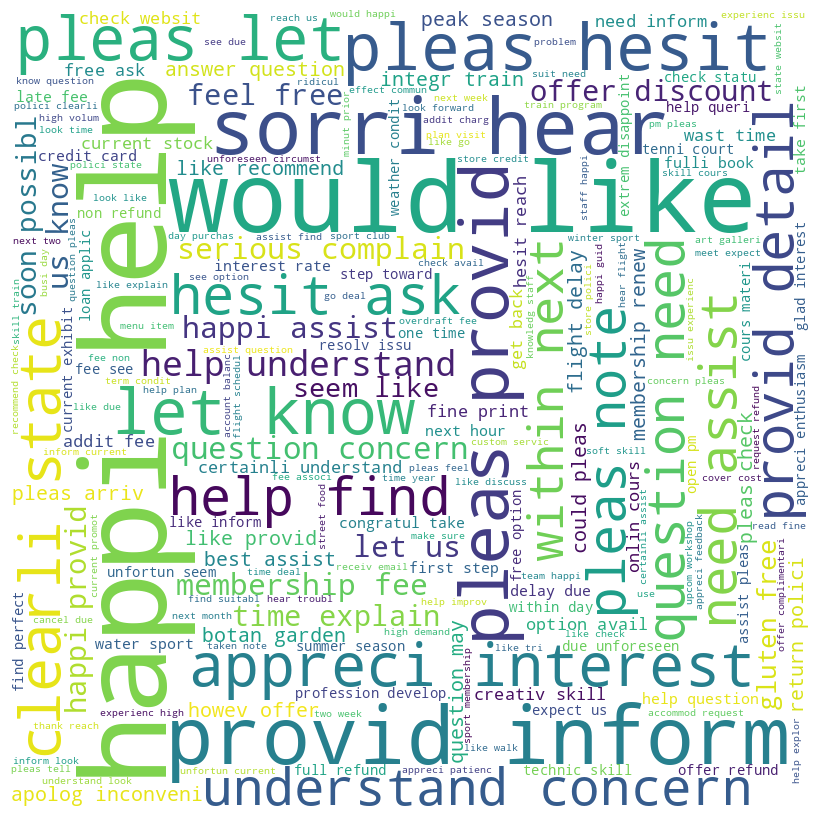

In [7]:
import wordcloud;
import matplotlib.pyplot as plt;


wordcloud_unclean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', stopwords = sw, min_font_size = 10).generate(" ".join(unclean_corpus));
plt.figure(figsize = (8, 8), facecolor = None);
plt.imshow(wordcloud_unclean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for unclean corpus");
plt.show();

wordcloud_clean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', stopwords = sw, min_font_size = 10).generate(" ".join(clean_corpus));
plt.figure(figsize = (8, 8), facecolor = None);
plt.imshow(wordcloud_clean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for clean corpus");
plt.show();



#### One noticeable difference is that some of the most common words like "help", "question" or "appreciate" were diminished, mainly because other words that were scattered in different forms in the unclean text were reduced to a common stem and a common standard so those words stand out more like "provid" "hear" and so on, because their counts increased. 

### Second representation model is **1-Hot vector**
##### This representation is basically Bag of Words but instead of focusing on the frequency of which the terms appear,it transforms each document into a binary vector where each dimension corresponds to a word from the vocabulary. If the word exists, a value of 1 is returned else a value of 0 indicating that the word does not exist. **We are only paying attention to term existence**
#### **Possible side effects of limiting the maximum number of features :**
##### Limiting the "max_features" in this representation might have a bigger impact than BoW, because BoW's term frequency might attenuate the decision made by, for instance, Naive Bayes, by having higher frequencies of the word of a certain class, balancing the cut made in less frequent words. On the other hand , 1-Hot focuses more on if the terms are indeed present in the vocabulary or not, meaning that a reduction in features from this representational model causes documents to lose vocabulary to distinguish one class from another, which is bad in this representation. However we could't find a workaround to maintain textual richness while decreasing memory used by the model so cutting features was a necessary step. 

In [8]:

binary_vectorizer = CountVectorizer(binary=True,max_features=max_features)
one_hot_clean = binary_vectorizer.fit_transform(clean_corpus)
print(one_hot_clean.shape)

one_hot_clean_test = binary_vectorizer.transform(clean_corpus_test);

feature_representations['one_hot'] = (one_hot_clean, one_hot_clean_test);

#print(one_hot_clean[0]);
binary_vectorizer_unclean = CountVectorizer(binary=True,max_features=max_features)
one_hot_unclean = binary_vectorizer.fit_transform(unclean_corpus)
print(one_hot_unclean.shape)


(80000, 1000)
(80000, 1000)


### Third representation is **TF-IDF**
##### This is a measure that takes into account the discriminative power of the words (repetitions of a word across documents/text or power of a word to distinguish the document content) from the vocabulary considering all the documents(our texts), by assigning a weight to each of the terms of the vocabulary.
##### **TF** stands for Term Frequency and is the total frequency that a word appears considering all the documents;
##### **DF** stands for Document Frequency and it measures the number of documents that have a certain word. The higher the more frequent is a word across all the documents (bad thing -> low discriminative power);
##### **IDF** stands for Inverse Document Frequency and the inverse of the DF. Higher means rarer the word is across all the documents (good thing -> high discriminative power).
##### **TF-IDF** is a measure that is the product of **TF** and **IDF**:
- ##### Highest when t occurs many times within a small number of documents (A);
- ##### Lower when the term occurs fewer times in a document, or occurs in many documents (B);
- ##### Lowest when the term occurs in virtually all documents (C).
### **Possible side effects limiting the maximum number of features:**
##### For tf-idf representation, we know that it is ordered by the td-idf value. By cutting off the features that have the lowest tf-idf value means we are abandoning words with few discriminative power (words that are common across the documents with little differentiating power), which in this case is benefitial for this representational model in particular. As we can see in the tf-idf plot of the top words with most tf-idf values.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer;

TfIdf_vectorizer_unclean = TfidfVectorizer(max_features = max_features);
Tf_idf_unclean = TfIdf_vectorizer_unclean.fit_transform(unclean_corpus).toarray();
Tf_idf_unclean_test = TfIdf_vectorizer_unclean.transform(unclean_corpus_test).toarray();
features_unclean = TfIdf_vectorizer_unclean.get_feature_names_out();
print("TfIdf unclean",Tf_idf_unclean.shape)


feature_representations['TfIdf'] = (Tf_idf_unclean, Tf_idf_unclean_test);

TfIdf_vectorizer = TfidfVectorizer(max_features = max_features);
Tf_Idf = TfIdf_vectorizer.fit_transform(clean_corpus).toarray();
features_clean = TfIdf_vectorizer.get_feature_names_out();
print("TfIdf clean", Tf_Idf.shape);
#print(Tf_Idf[0]);


TfIdf unclean (80000, 1000)
TfIdf clean (80000, 1000)


#### We can plot a word cloud to see the distribution of the words for the clean and unclean corpus according to their weight and importance, with Tf-Idf representation:

Word Cloud for clean corpus


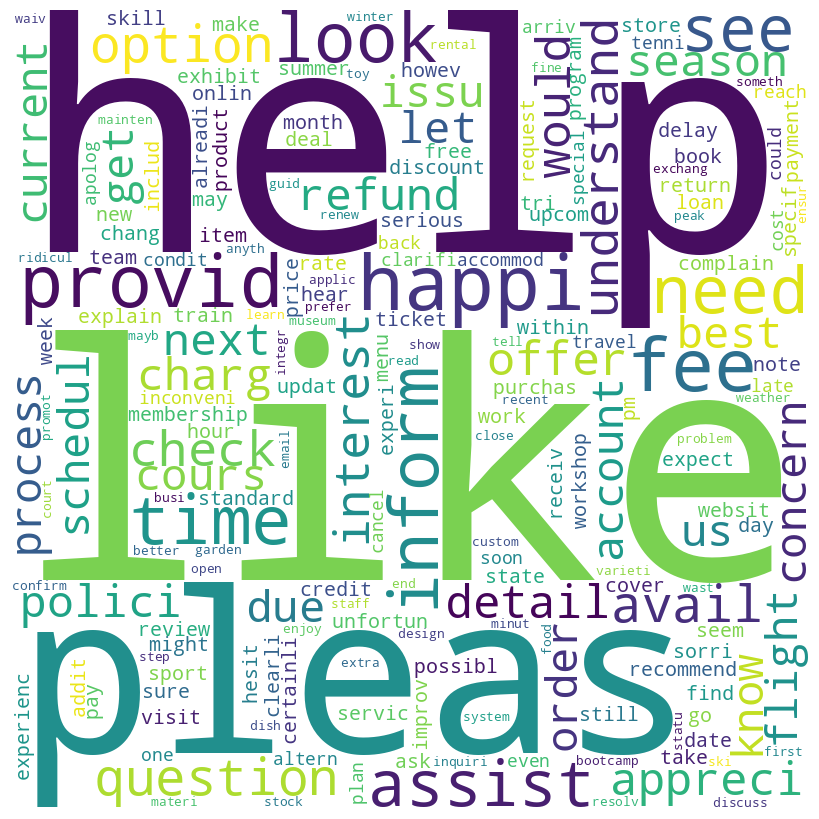

Word Cloud for unclean corpus


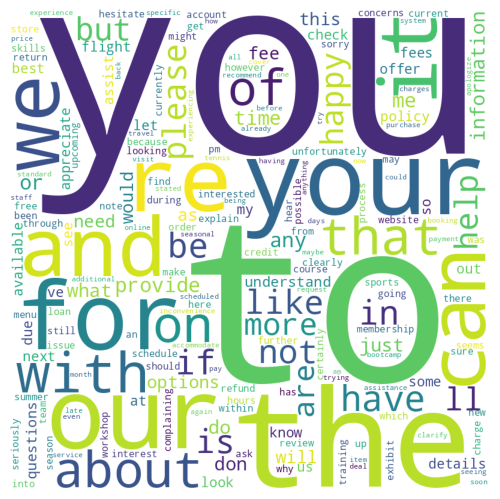

In [10]:
# dictionary to sum the weights of each unique word for the clean corpus
word_count = dict()
for i in range(0,len(clean_corpus)):
    for feature in range(0,len(features_clean)):
        word_count[features_clean[feature]] = word_count.get(features_clean[feature],0) + Tf_Idf[i][feature]

wordcloud_tfidf_clean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate_from_frequencies(word_count);
plt.figure(figsize = (8, 8), facecolor = None);
plt.imshow(wordcloud_tfidf_clean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for clean corpus");
plt.show();

#dict for unclean wordcount
word_count_unclean = dict()
for i in range(0,len(unclean_corpus)):
    for feature in range(0,len(features_unclean)):
        word_count_unclean[features_unclean[feature]] = word_count_unclean.get(features_unclean[feature],0) + Tf_idf_unclean[i][feature];

wordcloud_tfidf_unclean = wordcloud.WordCloud(width = 800, height = 800, background_color = 'white', min_font_size = 10).generate_from_frequencies(word_count_unclean);
plt.imshow(wordcloud_tfidf_unclean);
plt.axis("off");
plt.tight_layout(pad = 0);
print("Word Cloud for unclean corpus");
plt.show();

##### As we predicted, the stop words took over the entire word cloud in the unclean dataset. These occur the most and give us the least information about a document fulliling the condition (C) presented in the block above.
##### As for the clean version of the text corpus, words like "like" and "help" are most likely filling the condition (B), since they are often repeated and common in many documents in the dataset,

#### We opted not to use N-grams because the feature space it generates is too big and inefficient given our dataset, taking a toll on the memory.

## **Beyond sparce representations**

#### **The most compatible representation models are dense vectors which reduce the dimensionality by a significant amount. The sparce vector models (all the previous models) waste memory space unecessarily due to their sparsity and due to the size of the dataset it is impossible to run those models in weaker machines.**

##### We considered 3 type of **Word Embeddings**:
- ##### **Word2Vec**;
- ##### **FastText**;
- ##### **Doc2Vec**;
##### Each of them have pros and cons:
- ##### Word2Vec generates a high dimensionality vector taking word or phrases in the document just like Doc2Vec, but Doc2Vec handles larger text corpus (such as paragraphs or phrases) better than the Word2Vec;
- ##### FastText handles better subword information, but we are working in terms of word and its semantics, so it would not help this project.
##### So we opted using Word2Vec and Doc2Vec for comparison later on.


In [11]:
from gensim.models import Word2Vec
word2vec_embedding_unclean = Word2Vec(sentences = [text.split() for text in unclean_corpus], vector_size = 100, window = 5, min_count = 1, workers = 4);
word2vec_embedding_clean = Word2Vec(sentences = [text.split() for text in clean_corpus], vector_size = 100, window = 5, min_count = 1, workers = 4);
word2vec_embedding_clean_test = Word2Vec(sentences = [text.split() for text in clean_corpus_test], vector_size = 100, window = 5, min_count = 1, workers = 4);
feature_representations['word2vec'] = (word2vec_embedding_clean, word2vec_embedding_clean_test);

In [12]:
print(word2vec_embedding_unclean.wv.most_similar('help'));
print(word2vec_embedding_clean.wv.most_similar('help'));
print(word2vec_embedding_unclean.wv["help"]);
print(word2vec_embedding_clean.wv["help"]);

[('assist', 0.5856530070304871), ('help.', 0.4222188889980316), ('us!', 0.4218095541000366), ('return!', 0.40948551893234253), ('happy', 0.4061345160007477), ('frustration', 0.3802626430988312), ('equip', 0.37376004457473755), ('shopping', 0.36182287335395813), ('skills!', 0.34624671936035156), ('Thank', 0.3441457450389862)]
[('assist', 0.6503472328186035), ('regard', 0.48031318187713623), ('happi', 0.47882622480392456), ('concern', 0.4026269018650055), ('appreci', 0.3802335262298584), ('provid', 0.3560243248939514), ('hi', 0.351637065410614), ('misunderstand', 0.35087087750434875), ('need', 0.3378395438194275), ('certainli', 0.3351652920246124)]
[ 9.2346692e-01  1.9877352e+00  2.6368146e+00  5.5764599e+00
  9.0460271e-01  2.0558598e+00  3.1859610e+00  5.8197677e-01
 -2.4149990e-01 -1.9420581e+00 -1.5346540e+00 -1.1419320e+00
  5.1917067e+00  4.6698293e-01  1.6415712e+00 -1.9801677e+00
  1.0103703e+00 -1.0150760e+00  8.9595240e-01  2.0734661e+00
 -2.5637760e+00  7.8086913e-01  6.226885

In [13]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents_clean = [TaggedDocument(_d, [str(i)]) for i, _d in enumerate(clean_corpus)];
documents_clean_test = [TaggedDocument(_d, [str(i)]) for i, _d in enumerate(clean_corpus_test)];
documents_unclean = [TaggedDocument(_d, [str(i)]) for i, _d in enumerate(unclean_corpus)];
doc2vec_embedding_clean = Doc2Vec(documents_clean, vector_size=5, window=2, min_count=1, workers=4);
doc2vec_embedding_clean_test = Doc2Vec(documents_clean_test, vector_size=5, window=2, min_count=1, workers=4);
doc2vec_embedding_unclean = Doc2Vec(documents_unclean, vector_size=5, window=2, min_count=1, workers=4);
feature_representations['doc2vec'] = (doc2vec_embedding_clean, doc2vec_embedding_clean_test)

In [14]:
# Vectors of the first document in the clean and unclean corpus
print(doc2vec_embedding_clean.dv[0]);
print(doc2vec_embedding_unclean.dv[0]);
# Finding most similar documents to the first document in the clean corpus
print(doc2vec_embedding_clean.dv.most_similar([doc2vec_embedding_clean.dv[0]]))
# Finding most similar documents to the first document in the unclean corpus
print(doc2vec_embedding_unclean.dv.most_similar([doc2vec_embedding_unclean.dv[0]]))

[-0.05780507 -0.02775396  0.07908084 -0.15290953 -0.15291378]
[-0.5139467  -0.23769923  0.15438502  0.45824963 -0.37098786]
[('0', 1.0), ('24589', 0.9985342621803284), ('49678', 0.9981365203857422), ('24180', 0.9966982007026672), ('12263', 0.9964475631713867), ('5448', 0.996362030506134), ('70587', 0.9960476160049438), ('10792', 0.9957388639450073), ('28094', 0.9956559538841248), ('28326', 0.9945642948150635)]
[('0', 1.0), ('20410', 0.9998130798339844), ('15033', 0.9991921782493591), ('65503', 0.9990643858909607), ('30341', 0.998695433139801), ('51623', 0.9985566735267639), ('59574', 0.9978929758071899), ('3261', 0.9978408217430115), ('54571', 0.997783899307251), ('55640', 0.9977353811264038)]


### In summary, the following representational models are what we are going to work with:

In [15]:
# BoW
#print(BoW.shape);
# TfIdf
#print(Tf_Idf.shape);
# One Hot
#print(one_hot_clean.shape);
# Word2Vec vocab mapping with vectors
#print(word2vec_embedding_clean.wv);
# Doc2Vec document mapping with vectors
#print(doc2vec_embedding_clean.dv);

## **Model Training**

##### As we have our feature representations, we can start to train our models.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import psutil

mem = psutil.virtual_memory()
print(f"Total Memory: {mem.total / 1e9:.2f} GB")
print(f"Available Memory: {mem.available / 1e9:.2f} GB")
print(f"Used Memory: {mem.used / 1e9:.2f} GB ({mem.percent}%)")

y_train = training_set['label']
y_test = test_set['label']
# Define Models
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "MLP": MLPClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
}

# Train and Evaluate Models for Each Feature Representation
final_results = {}

for feature_name, (X_train, X_test) in feature_representations.items():  # Extract (x_train, x_test)
    print(f"\nEvaluating Feature Representation: {feature_name}")
    results = {}

    # Standardize if required (for models that need it)
    if feature_name in ["word2vec_embedding_clean", "doc2vec_embedding_clean", "Tf_Idf", "BoW"]:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train on training set
        y_pred = model.predict(X_test)  # Predict on test set
        accuracy = accuracy_score(y_test, y_pred)  # Evaluate
        results[model_name] = accuracy
        print(f"{model_name}: Accuracy = {accuracy:.4f}")

    final_results[feature_name] = results  # Store results for this feature representation

# Print Overall Results
print("\n===== Model Performance Across Feature Representations =====")
for feature, results in final_results.items():
    print(f"\nFeature Representation: {feature}")
    for model, acc in results.items():
        print(f"{model}: {acc:.4f}")


Total Memory: 8.15 GB
Available Memory: 1.68 GB
Used Memory: 6.22 GB (79.4%)

Evaluating Feature Representation: BoW
Naive Bayes: Accuracy = 0.7267


/home/joca/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: Accuracy = 0.8429
Decision Tree: Accuracy = 0.8151


KeyboardInterrupt: 